# *Importing Modules*

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# *Get X and Y*

In [3]:
np.random.seed(0)
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)
x

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ],
       [ 0.87536468],
       [-0.37447673],
       [ 2.350638  ],
       [ 2.78197656],
       [-0.69935089],
       [ 1.75035023],
       [ 0.17336952],
       [ 0.40826737],
       [ 2.55357983],
       [-2.57378365],
       [-2.4772242 ],
       [-2.87868962],
       [ 1.99571907],
       [ 1.66894051],
       [ 2.22007289],
       [ 2.87171005],
       [ 1.79495139],
       [-0.23112383],
       [ 1.68317506],
       [-2.29035344],
       [ 0.83952613],
       [-2.13988028],
       [ 2.6680135 ],
       [ 0.13108993],
       [-0.51202836],
       [-1.41266633],
       [ 1.64540214],
       [-0.26309801],
       [ 0.41060369],
       [-2.8872612 ],
       [ 0.70581298],
       [ 0.67257434],
       [ 0.70160398],
       [ 2.66248847],
       [ 1.09092179],
       [-0.8429526 ],
       [-0.37780828],
       [ 1.18578718],
       [-2.63864717],
       [ 1.00060029],
       [ 1

# *Splitting Data*

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

array([[-2.03214289],
       [ 0.45567897],
       [-2.13988028],
       [ 1.18578718],
       [-2.42340955],
       [-2.4772242 ],
       [-0.8429526 ],
       [ 0.51907761],
       [-0.69935089],
       [ 2.86056653],
       [ 0.17336952],
       [-2.22644221],
       [-1.40766305],
       [ 0.13108993],
       [ 1.29796322],
       [ 0.87536468],
       [ 1.92595938],
       [-0.78764898],
       [ 0.70581298],
       [-2.87868962],
       [-0.81773537],
       [-2.8872612 ],
       [ 2.350638  ],
       [-1.90085183],
       [ 2.6680135 ],
       [ 2.22007289],
       [-0.51442203],
       [ 0.83952613],
       [ 0.93797754],
       [ 2.55357983],
       [-2.29035344],
       [ 0.2692991 ],
       [ 1.99571907],
       [ 2.66248847],
       [ 2.78197656],
       [-1.22315881],
       [-0.37447673],
       [-1.82050583],
       [ 0.67257434],
       [ 2.57577719],
       [ 0.91864995],
       [-2.97182714],
       [-1.74673946],
       [-2.63864717],
       [ 0.42118062],
       [-2

# *Get Best Parameters of Linear Regression*

In [6]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}
 
model = LinearRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.17599598208174275


In [7]:
model=LinearRegression(**grid_search.best_params_)
model.fit(x_train,y_train)

LinearRegression(positive=True)

In [8]:
model.score(x_test,y_test) #Very Very Bad

0.3935767096418983

# *How To Know That model isnot Linear*

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19224\3381072787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-model.predict(x_test))


Text(0.5, 1.0, 'Resuidal Error Density')

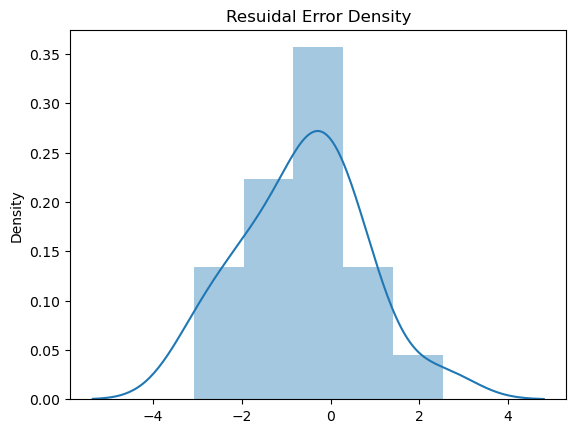

In [9]:
sns.distplot(y_test-model.predict(x_test))
plt.title("Resuidal Error Density") #high range about zero :)

# *Get Best Parameters of Polynomial Regression*

In [14]:
from sklearn.pipeline import make_pipeline
# Define a parameter grid
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(x_train, y_train)

# Get the best parameter
best_degree = grid_search.best_params_['polynomialfeatures__degree']
print("Best polynomial degree:", best_degree)

Best polynomial degree: 2


# *Polynomial Model*

In [17]:
# Create polynomial features
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
x_poly = poly.fit_transform(x_train)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [18]:
model.score(x_poly,y_train)

0.8066503441636745

In [19]:
x_test_poly=poly.fit_transform(x_test)
model.score(x_test_poly,y_test)

0.7506782895695159

# *Visualization*

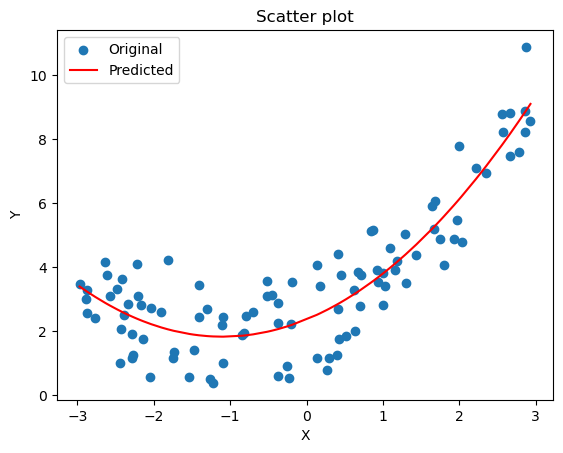

In [22]:
# Scatter plot of original data
plt.scatter(x, y, label='Original')

# Sort the x values
x_sorted = np.sort(x, axis=0)

# Predict y values for sorted x values
y_pred_sorted = model.predict(poly.fit_transform(x_sorted))

# Plot the predicted values
plt.plot(x_sorted, y_pred_sorted, label='Predicted', color='red')

plt.title("Scatter plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19224\4141219848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-model.predict(x_test_poly))


Text(0.5, 1.0, 'Resuidal Error Density')

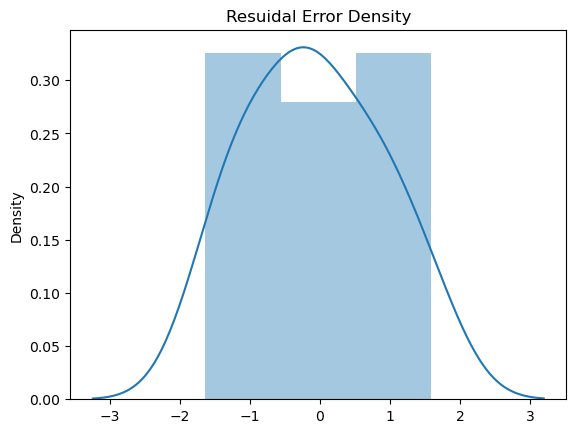

In [23]:
sns.distplot(y_test-model.predict(x_test_poly))
plt.title("Resuidal Error Density") #the model minimize the range